In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## Import data and Analysis
### Stocks: XOM, AAPL, FB, WMT

In [2]:
# Loading stocks from csv into a dataframe
xom_data = pd.read_csv('XOM.csv',index_col='Date',parse_dates=True)
aapl_data = pd.read_csv('AAPL.csv',index_col='Date',parse_dates=True)
fb_data = pd.read_csv('FB.csv',index_col='Date',parse_dates=True)
wmt_data = pd.read_csv('WMT.csv',index_col='Date',parse_dates=True)

aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-01,24.412500,25.192499,24.355000,25.132500,23.375963,201628400
2016-03-02,25.127501,25.222500,24.910000,25.187500,23.427116,132678400
2016-03-03,25.145000,25.427500,25.112499,25.375000,23.601511,147822800
2016-03-04,25.592501,25.937500,25.342501,25.752501,23.952627,184220400
2016-03-07,25.597500,25.707500,25.240000,25.467501,23.687551,143315600


In [3]:
# Clean data using only Close price and combining them int Stocks df
xom_close = xom_data['Close']
aapl_close = aapl_data['Close']
fb_close = fb_data['Close']
wmt_close = wmt_data['Close']
stocks = pd.concat([xom_close,aapl_close,fb_close,wmt_close],axis=1)
stocks.columns = ['xom','aapl','fb','wmt']
stocks.head()

,xom,aapl,fb,wmt
Date,,,,
2016-03-01,81.279999,25.132500,109.820000,66.459999
2016-03-02,82.699997,25.187500,109.949997,66.209999
2016-03-03,82.400002,25.375000,109.580002,66.139999
2016-03-04,82.290001,25.752501,108.389999,66.779999
2016-03-07,84.459999,25.467501,105.730003,67.889999


In [4]:
# Find mean daily return 
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

xom    -0.000153
aapl    0.001432
fb      0.000884
wmt     0.000631
dtype: float64

In [5]:
# Find correlation
stocks.pct_change(1).corr()

,xom,aapl,fb,wmt
xom,1.000000,0.370574,0.309310,0.228893
aapl,0.370574,1.000000,0.591068,0.346071
fb,0.309310,0.591068,1.000000,0.231093
wmt,0.228893,0.346071,0.231093,1.000000


<AxesSubplot:>

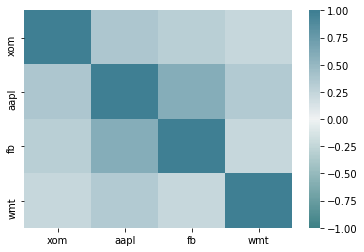

In [6]:
sns.heatmap(stocks.pct_change(1).corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 220, n=200))

<AxesSubplot:xlabel='Date'>

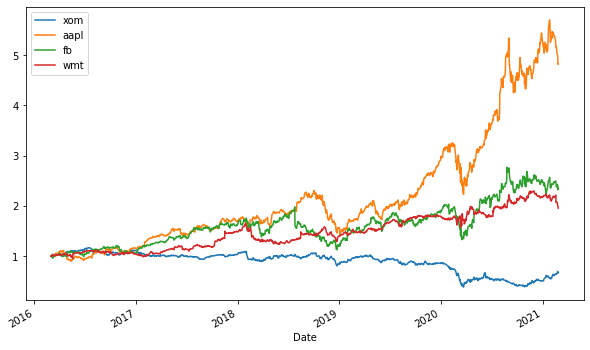

In [7]:
#Normalize stocks df
stock_norm = stocks/stocks.iloc[0]
stock_norm.plot(figsize=(10,6))

In [8]:
#Calculating daily returns using pandas method
stock_daily_return = stocks.pct_change(1)
stock_daily_return.head()

,xom,aapl,fb,wmt
Date,,,,
2016-03-01,NaN,NaN,NaN,NaN
2016-03-02,0.017470,0.002188,0.001184,-0.003762
2016-03-03,-0.003628,0.007444,-0.003365,-0.001057
2016-03-04,-0.001335,0.014877,-0.010860,0.009676
2016-03-07,0.026370,-0.011067,-0.024541,0.016622


In [9]:
#Calculating log returns
log_return = np.log(stocks/stocks.shift(1))
log_return.head()

,xom,aapl,fb,wmt
Date,,,,
2016-03-01,NaN,NaN,NaN,NaN
2016-03-02,0.017320,0.002186,0.001183,-0.003769
2016-03-03,-0.003634,0.007417,-0.003371,-0.001058
2016-03-04,-0.001336,0.014767,-0.010919,0.009630
2016-03-07,0.026028,-0.011129,-0.024847,0.016485


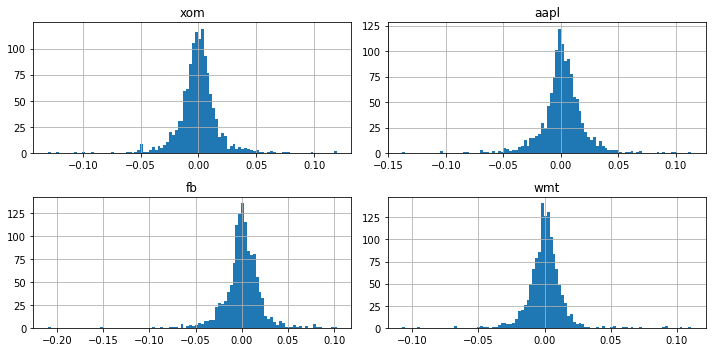

In [10]:
log_return.hist(bins=100,figsize=(10,5));
plt.tight_layout()

In [11]:
log_return.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
xom,1257.0,-0.000320,0.018306,-0.130391,-0.007808,-0.000117,0.007236,0.119442
aapl,1257.0,0.001252,0.018947,-0.137708,-0.006153,0.000950,0.009968,0.113157
fb,1257.0,0.000678,0.020361,-0.210239,-0.007310,0.001164,0.010803,0.102704
wmt,1257.0,0.000533,0.013940,-0.107399,-0.005377,0.000530,0.006377,0.110723


In [12]:
# Using total number of days in a year 253
log_return.mean() * 253

xom    -0.080929
aapl    0.316758
fb      0.171614
wmt     0.134917
dtype: float64

In [13]:
# Covariance in 253 days
log_return.cov() * 253

,xom,aapl,fb,wmt
xom,0.084780,0.033185,0.029492,0.015083
aapl,0.033185,0.090822,0.057584,0.023256
fb,0.029492,0.057584,0.104887,0.016764
wmt,0.015083,0.023256,0.016764,0.049164


In [44]:
# Code from Mushfiqur Rahman link: https://github.com/mrmushfiq/python_meets_finance/blob/master/Portfolio_optimization/efficient_frontier_Portfolio_optimization.ipynb

num_runs = 10000

all_weights = np.zeros((num_runs,len(stocks.columns)))
ret_arr = np.zeros(num_runs)
vol_arr = np.zeros(num_runs)
sharpe_arr = np.zeros(num_runs)

for ind in range(num_runs):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_return.mean() * weights) *253)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 253, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    
    data = {'Returns':ret_arr, 'Volatility':vol_arr}

for counter, symbol in enumerate(stocks.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in all_weights]

In [15]:
sharpe_arr.max()

1.0675241163115992

In [16]:
sharpe_arr.argmax()

2863

In [26]:
all_weights[2863,:]

array([0.00260522, 0.64302489, 0.07011903, 0.28425086])

In [27]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

print('Return with Maximum SR')
print(max_sr_ret)
print('Volality with Maximum SR')
print(max_sr_vol)

Return with Maximum SR
0.2538562609226015
Volality with Maximum SR
0.237799087668108


In [45]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,xom weight,aapl weight,fb weight,wmt weight
0,0.128213,0.203566,0.273552,0.243387,0.220260,0.262801
1,0.108041,0.192812,0.224978,0.061446,0.286428,0.427148
2,0.082520,0.215578,0.345687,0.039286,0.410796,0.204231
3,0.037437,0.216023,0.512688,0.016373,0.278072,0.192867
4,0.077840,0.216196,0.494435,0.258208,0.073349,0.174008


In [72]:
# Find weights based on desired ranges of return and volatitilities
seach_df = portfolios.loc[(portfolios['Returns'] >= 0.22) & (portfolios['Returns'] <= 0.23)]
seach_df = seach_df.loc[(seach_df['Volatility'] >= 0.21) & (seach_df['Volatility'] <= 0.216)]
seach_df

,Returns,Volatility,xom weight,aapl weight,fb weight,wmt weight
6508,0.220225,0.213479,0.013242,0.477069,0.038576,0.471114
7215,0.224540,0.215331,0.004897,0.489772,0.044124,0.461207


## Effective frontier

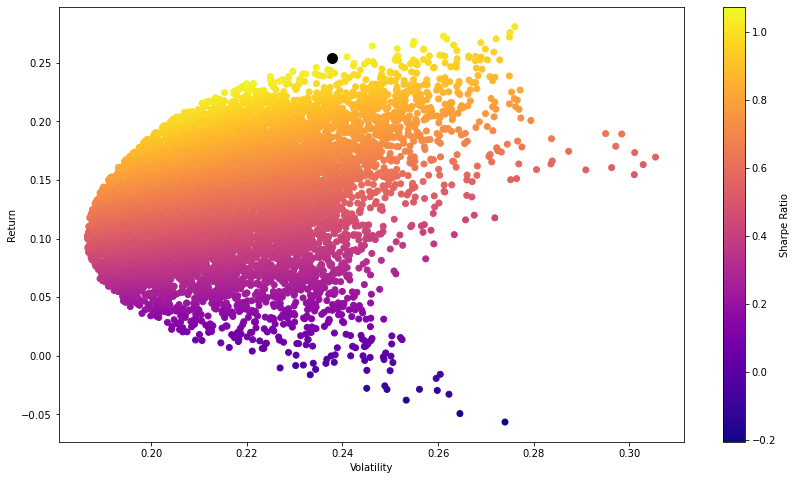

In [83]:
plt.figure(figsize=(14,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='black',s=100,edgecolors='black')
#plt.scatter(0.213,0.22,c='black',s=50,edgecolors='blue')